In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [27]:
df =pd.read_csv("../Dataset/india_cases.csv",index_col='Date',parse_dates=True)


In [28]:
df.head

<bound method NDFrame.head of                Cases
Date                
2020-01-22         0
2020-01-23         0
2020-01-24         0
2020-01-25         0
2020-01-26         0
...              ...
2023-05-03  44689327
2023-06-03  44689593
2023-07-03  44689919
2023-08-03  44690298
2023-09-03  44690738

[1143 rows x 1 columns]>

<Axes: xlabel='Date'>

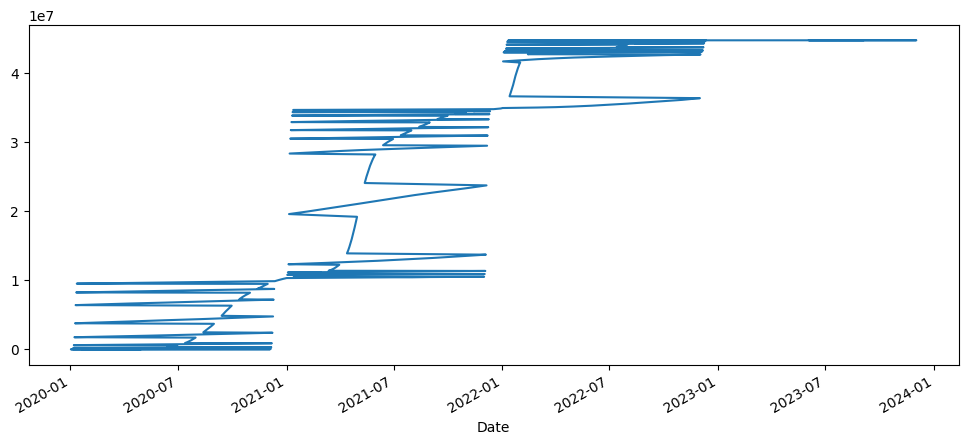

In [29]:
df['Cases'].plot(figsize=(12,5))

In [30]:
from statsmodels.tsa.stattools import adfuller
def ad_test(dataset):
     dftest = adfuller(dataset, autolag = 'AIC')
     print("1. ADF : ",dftest[0])
     print("2. P-Value : ", dftest[1])
     print("3. Num Of Lags : ", dftest[2])
     print("4. Num Of Observations Used For ADF Regression:",      dftest[3])
     print("5. Critical Values :")
     for key, val in dftest[4].items():
         print("\t",key, ": ", val)

ad_test(df)

1. ADF :  -1.2689949849829436
2. P-Value :  0.6432351193693988
3. Num Of Lags :  22
4. Num Of Observations Used For ADF Regression: 1120
5. Critical Values :
	 1% :  -3.4362020989495545
	 5% :  -2.864124028818559
	 10% :  -2.5681458107461737


In [31]:
df.shape

(1143, 1)

In [32]:
# verification of model is working fine
train=df.iloc[:914]
test=df.iloc[914:]
print(train.shape,test.shape)

(914, 1) (229, 1)


<Axes: xlabel='Date'>

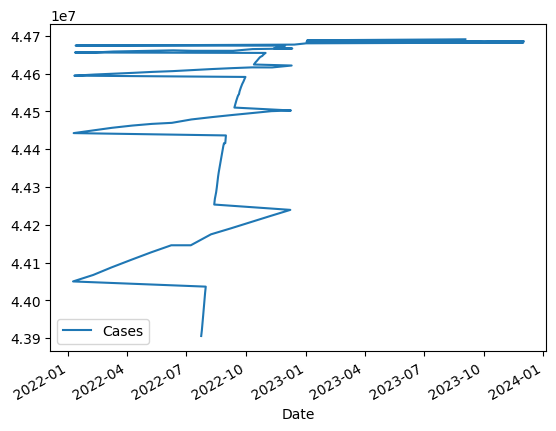

In [33]:
test.plot()

In [34]:
from pmdarima import auto_arima
import warnings
warnings.filterwarnings("ignore")
stepwisefit=auto_arima(train,trace=True,suppress_warnings=True)
stepwisefit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0]             : AIC=18837.624, Time=0.41 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=18965.667, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=18907.745, Time=0.02 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=18902.550, Time=0.04 sec
 ARIMA(1,2,2)(0,0,0)[0]             : AIC=18863.835, Time=0.21 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=18890.113, Time=0.23 sec
 ARIMA(3,2,2)(0,0,0)[0]             : AIC=18742.601, Time=0.62 sec
 ARIMA(3,2,1)(0,0,0)[0]             : AIC=18827.914, Time=0.30 sec
 ARIMA(4,2,2)(0,0,0)[0]             : AIC=18819.649, Time=0.75 sec
 ARIMA(3,2,3)(0,0,0)[0]             : AIC=18713.102, Time=0.92 sec
 ARIMA(2,2,3)(0,0,0)[0]             : AIC=18818.258, Time=0.52 sec
 ARIMA(4,2,3)(0,0,0)[0]             : AIC=18707.840, Time=1.31 sec
 ARIMA(5,2,3)(0,0,0)[0]             : AIC=18711.035, Time=1.68 sec
 ARIMA(4,2,4)(0,0,0)[0]             : AIC=18705.061, Time=1.56 sec
 ARIMA(3,2,4)(0,0,0

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  914
Model:               SARIMAX(2, 2, 5)   Log Likelihood               -9321.216
Date:                Thu, 11 Apr 2024   AIC                          18658.432
Time:                        22:55:04   BIC                          18696.957
Sample:                             0   HQIC                         18673.139
                                - 914                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.1939      0.011    104.536      0.000       1.171       1.216
ar.L2         -0.8943      0.012    -72.317      0.000      -0.919      -0.870
ma.L1         -1.2119      0.021    -57.666      0.000      -1.253      -1.171
ma.L2          0.9151      0.033     27.904      0.000       0.851       0.979
ma.L3          0.3371      0.036      9.306      0.000       0.266       0.408
ma.L4         -0.5976      0.030    -20.052      0.000      -0.656      -0.539
ma.L5          0.5493      0.019     29.083      0.000       0.512       0.586
sigma2      5.515e+07   6.89e-10   8.01e+16      0.000    5.51e+07    5.51e+07
===================================================================================
Ljung-Box (L1) (Q):                   6.41   Jarque-Bera (JB):              3911.23
Prob(Q):                              0.01   Prob(JB):                         0.00
Heteroskedasticity (H):               4.63   Skew:                             0.27
Prob(H) (two-sided):                  0.00   Kurtosis:                        13.13
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 8.34e+31. Standard errors may be unstable.
"""

In [35]:
from statsmodels.tsa.arima.model import ARIMA
param=stepwisefit.get_params()
ord=param['order']
model=ARIMA(train,order=ord)
model=model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Cases   No. Observations:                  914
Model:                 ARIMA(2, 2, 5)   Log Likelihood               -9321.216
Date:                Thu, 11 Apr 2024   AIC                          18658.432
Time:                        22:55:04   BIC                          18696.957
Sample:                             0   HQIC                         18673.139
                                - 914                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.1939      0.011    104.536      0.000       1.171       1.216
ar.L2         -0.8943      0.012    -72.317      0.000      -0.919      -0.870
ma.L1         -1.2119      0.021    -57.666      0.000      -1.253      -1.171
ma.L2          0.9151      0.033     27.904      0.000       0.851       0.979
ma.L3          0.3371      0.036      9.306      0.000       0.266       0.408
ma.L4         -0.5976      0.030    -20.052      0.000      -0.656      -0.539
ma.L5          0.5493      0.019     29.083      0.000       0.512       0.586
sigma2      5.515e+07   6.89e-10   8.01e+16      0.000    5.51e+07    5.51e+07
===================================================================================
Ljung-Box (L1) (Q):                   6.41   Jarque-Bera (JB):              3911.23
Prob(Q):                              0.01   Prob(JB):                         0.00
Heteroskedasticity (H):               4.63   Skew:                             0.27
Prob(H) (two-sided):                  0.00   Kurtosis:                        13.13
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 8.34e+31. Standard errors may be unstable.
"""

<Axes: xlabel='Date'>

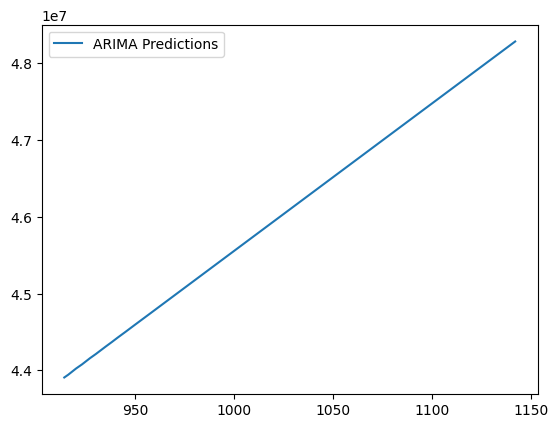

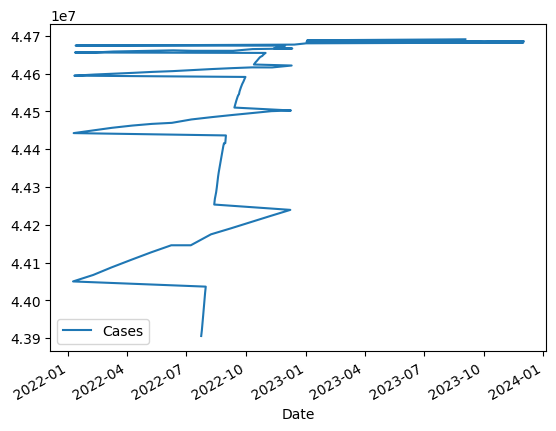

In [36]:
start=len(train)
end=len(train)+len(test)-1
pred=model.predict(start=start,end=end,typ='levels').rename('ARIMA Predictions')
pred.plot(legend=True)
test.plot(legend=True)

In [37]:
# final function
def forecast(inputlst,upto):
    data=pd.DataFrame(inputlst)
    stepwise_fit=auto_arima(data,trace=True,suppress_warnings=True)
    param=stepwise_fit.get_params()
    ord=param['order']
    model=ARIMA(data,order=ord)
    model=model.fit()

    start=len(data)
    end=len(data)+upto-1
    pred=model.predict(start=start,end=end,typ='levels').rename('ARIMA Predictions')
    return pred.astype(int)


    

In [38]:
lst=[]
for index, row in df.iterrows():
    lst.append(row['Cases'])

In [39]:
ip1=lst[:500]
exp=lst[500:643]


Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0]             : AIC=10273.734, Time=0.21 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=10320.830, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=10310.571, Time=0.01 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=10309.567, Time=0.03 sec
 ARIMA(1,2,2)(0,0,0)[0]             : AIC=10283.496, Time=0.14 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=10304.872, Time=0.16 sec
 ARIMA(3,2,2)(0,0,0)[0]             : AIC=10207.311, Time=0.38 sec
 ARIMA(3,2,1)(0,0,0)[0]             : AIC=10263.026, Time=0.19 sec
 ARIMA(4,2,2)(0,0,0)[0]             : AIC=10260.195, Time=0.28 sec
 ARIMA(3,2,3)(0,0,0)[0]             : AIC=10192.161, Time=0.78 sec
 ARIMA(2,2,3)(0,0,0)[0]             : AIC=10265.516, Time=0.32 sec
 ARIMA(4,2,3)(0,0,0)[0]             : AIC=10208.150, Time=0.83 sec
 ARIMA(3,2,4)(0,0,0)[0]             : AIC=10237.761, Time=0.99 sec
 ARIMA(2,2,4)(0,0,0)[0]             : AIC=10247.377, Time=0.66 sec
 ARIMA(4,2,4)(0,0,0

(143,)

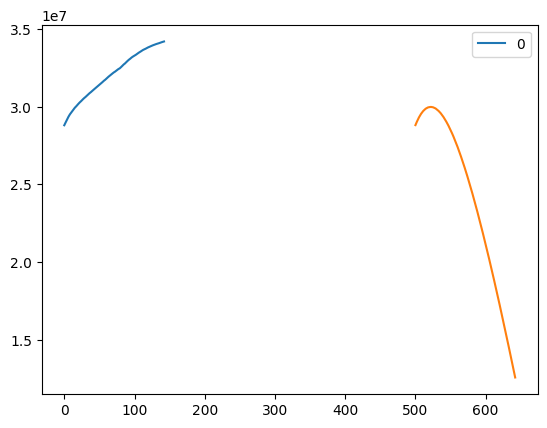

In [40]:
pred3=forecast(ip1,143)


dfexp=pd.DataFrame(exp)
dfexp.plot(label='true')
pred3.plot(label='Predicted')

pred3.shape

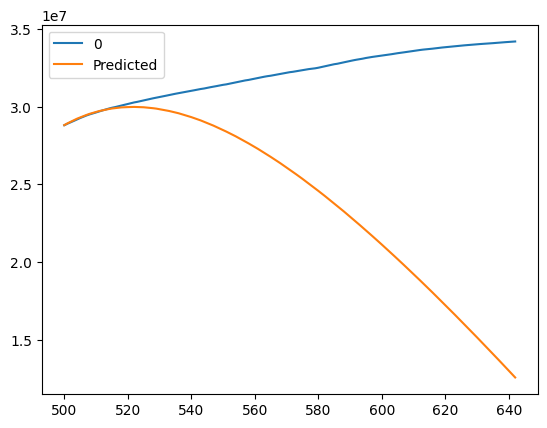

In [41]:
dfexp = pd.DataFrame(exp, index=pred3.index)  # Set the index of `exp` to match `pred3`

# Plot both DataFrames on the same graph
dfexp.plot(label='orginal')
pred3.plot(label='Predicted')
plt.legend()
plt.show()

In [42]:
test.shape

(229, 1)

In [43]:
dfexp.tail()

,0
638,34143236
639,34159562
640,34175468
641,34189774
642,34202202


In [44]:
pred.tail()

1138    4.820731e+07
1139    4.822651e+07
1140    4.824571e+07
1141    4.826491e+07
1142    4.828411e+07
Name: ARIMA Predictions, dtype: float64

In [45]:
pred3,dfexp

(500    28818175
 501    28931853
 502    29031635
 503    29131840
 504    29230625
          ...   
 638    13444088
 639    13226637
 640    13011287
 641    12794560
 642    12575047
 Name: ARIMA Predictions, Length: 143, dtype: int32,
             0
 500  28809339
 501  28909975
 502  28996473
 503  29089069
 504  29182532
 ..        ...
 638  34143236
 639  34159562
 640  34175468
 641  34189774
 642  34202202
 
 [143 rows x 1 columns])